# CUSTOMER ANALYSIS - Features Engineering

Using k-means algorithm (2 clusters) :

1) Dimension number optimization (Kaiser's rule, elbow (% VAR), threshold (cum % VAR)).

2) Evaluate clustering results (silhouette score) standardized full features and dimension reduction.

3) 3D Visualization

Conclusion :

1) Dimension number optimization :
- Kaiser's rule : 22
- elbow : 2
- threshold cumulated % VAR (> 80 %) : 13

2) Silhouette score (13 dimensions) : 0.27 // silhouette score (3 dimensions) : 0.46

## LIBRARIES IMPORT

In [1]:
# Data process
import pandas as pd
import matplotlib.pyplot as plt

import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize, StandardScaler, MaxAbsScaler

# ML
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# Features Engineering
from sklearn.decomposition import PCA

## DATA IMPORT

Get data from csv

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

## DATA EXPLORATION

See what does data looklike

In [3]:
#df.head()

## DATA PREPROCESSING

### Pre process data according to data viz observations

In [4]:
df_p = df.drop(df[df.Year_Birth < 1920].index)

In [5]:
df_p.drop(df[df.Marital_Status =='Absurd'].index, inplace = True)
df_p.drop(df[df.Marital_Status =='YOLO'].index, inplace = True)
df_p.replace('Alone', 'Single', inplace = True)

In [6]:
df_p.drop(df[df.Income == 666666].index, inplace = True)

In [7]:
def convert_to_timestamp(x):
    """Convert date objects to integers"""
    return time.mktime(x.timetuple())

df_p['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, dayfirst=True).apply(convert_to_timestamp)

In [8]:
df_p.dropna(inplace=True)

In [9]:
df_p.reset_index(inplace = True, drop = True)

### Features selection and encoding

Slice df to define X_1, matrix of numerical features

In [10]:
X_1 = df_p[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]

Label encode Education and Marital Status features

In [11]:
le = LabelEncoder()

In [12]:
edu = le.fit_transform(df_p['Education'])
marit = le.fit_transform(df_p['Marital_Status'])

Definition of df X_2, matrix of encoded features

In [13]:
X_2 = pd.concat([pd.DataFrame(edu.reshape((-1, 1))), pd.DataFrame(marit.reshape((-1, 1)))], axis = 1)
X_2.columns = ['Education', 'Marital_Status']

Definition of X, matrix of all features

In [14]:
X = pd.concat([X_1, X_2], axis = 1)
#X

### Features Standardization

In [15]:
#X_n = pd.DataFrame(normalize(X, axis = 0), columns = X.columns)
scaler = StandardScaler()
#scaler = MaxAbsScaler()

#scaler

In [16]:
#scaler.fit(X)

In [17]:
#scaler.mean_

In [18]:
X_n = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
#X_n

## FEATURES ENGINEERING (PCA)

### Dimension number optimization

In [57]:
pca = PCA(n_components = 25).fit(X_n)
exp_var_ratio = round(pd.DataFrame(pca.explained_variance_ratio_, index=[str(o) for o in range(1, 26)]), 4) * 100 #'PC' + 
exp_var_ratio.columns = ['% VAR']
#exp_var_ratio

In [59]:
exp_var_cum = exp_var_ratio.cumsum()
exp_var_cum.columns = ['CUM % VAR']
#exp_var_cum

In [61]:
comp_opt = pd.concat([exp_var_ratio, exp_var_cum], axis = 1)
comp_opt.head()

,% VAR,CUM % VAR
1,25.90,25.90
2,8.28,34.18
3,7.43,41.61
4,6.36,47.97
5,4.59,52.56


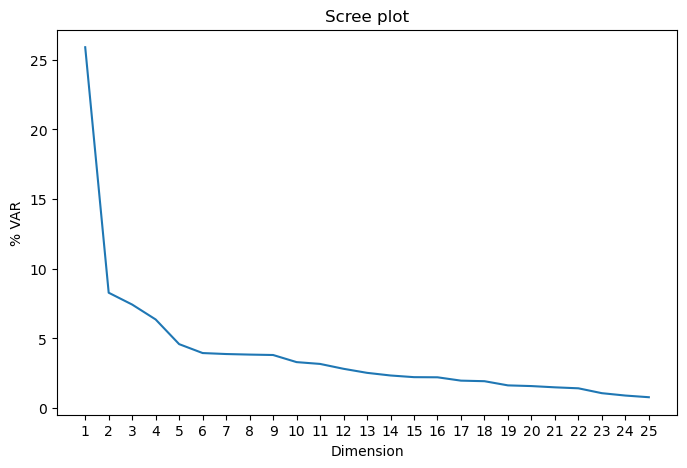

In [66]:
plt.figure(figsize=(8, 5))

plt.title('Scree plot')
plt.plot(comp_opt['% VAR'])
plt.xlabel('Dimension')
plt.ylabel('% VAR')

plt.show()

Optimized dimensions (Kaiser's rule) : 22

Optimized dimensions (elbow) : 2

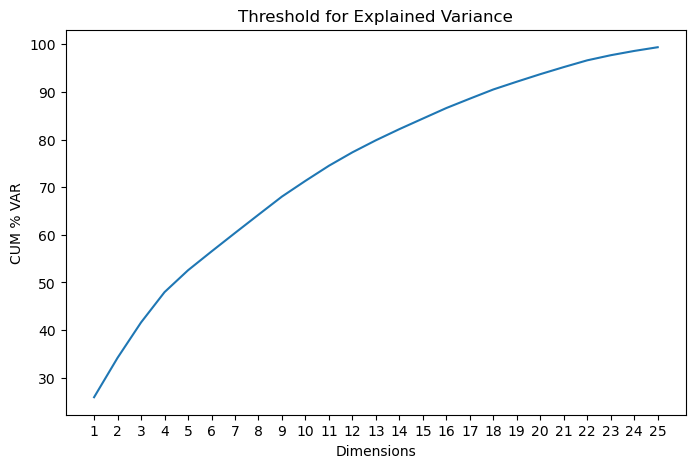

In [67]:
plt.figure(figsize=(8, 5))

plt.title('Threshold for Explained Variance')
plt.plot(comp_opt['CUM % VAR'])
plt.xlabel('Dimensions')
plt.ylabel('CUM % VAR')

plt.show()

Optimized dimensions (80 %) : 13

## CLASSIFICATION

In [24]:
n_clusters = 2
random_state = 130

### PCA 13 dimensions

In [25]:
n_components = 13

In [26]:
pca = PCA(n_components = n_components)

In [27]:
pca.fit(X_n)

PCA(n_components=13)

In [28]:
#X_n.shape

In [29]:
X_pca = pca.transform(X_n)
 
# Check the dimensions of data after PCA
#X_pca.shape

In [30]:
#pd.DataFrame(X_pca)

In [31]:
# Check the values of eigen vectors produced by principal components
pd.DataFrame(pca.components_, columns = X.columns)

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
0,-0.061204,0.330046,-0.252449,-0.051015,-0.037864,0.001291,0.304159,0.260451,0.310529,0.270536,...,-0.242764,0.019053,0.095824,0.187839,0.167450,0.057861,-0.013890,0.106682,0.020270,0.010156
1,-0.305801,0.048247,-0.060121,0.480765,-0.225837,0.014826,0.199079,-0.136299,-0.121808,-0.147492,...,0.236520,-0.032907,0.167206,-0.098533,-0.088044,0.060635,-0.002437,0.010365,0.200083,-0.005027
2,0.119234,-0.041793,0.104327,-0.149443,-0.046354,-0.112699,0.154702,-0.171635,-0.019211,-0.170562,...,0.166612,0.218610,0.366758,0.379626,0.329240,0.369803,-0.014364,0.436515,0.102205,-0.021873
3,0.317910,-0.171295,0.151299,-0.176565,-0.458749,-0.067053,-0.048033,0.156395,0.042018,0.151114,...,0.319988,0.217446,-0.201710,-0.093654,-0.033081,-0.106928,0.060505,0.219942,-0.317038,-0.056643
4,0.203062,-0.048749,0.029399,-0.086968,-0.158842,0.438714,0.053702,-0.001021,-0.038285,0.032936,...,0.097168,-0.489910,0.383820,0.102129,0.034460,0.243553,0.027631,-0.306658,-0.361396,0.082089
5,-0.248999,-0.039757,-0.048892,0.038331,-0.108908,0.104546,-0.047715,-0.009522,-0.003197,0.042336,...,-0.007733,0.150346,-0.058106,0.014773,-0.017491,0.088424,0.508067,0.070714,-0.077318,0.760252
6,-0.015918,0.007164,0.021726,0.121705,0.199843,0.664553,0.004513,-0.047268,-0.047221,-0.053107,...,-0.031383,0.549307,-0.113425,0.034804,0.083081,0.121439,0.081798,-0.150100,-0.077017,-0.268738
7,-0.039305,0.030298,-0.040890,0.114684,0.101766,-0.279171,-0.032383,0.035767,-0.067599,-0.009689,...,-0.050618,-0.085789,0.074106,0.021054,0.051348,0.048270,0.765319,-0.010833,-0.219960,-0.473216
8,0.136188,0.059752,0.145809,-0.230338,-0.268200,0.354432,0.119763,-0.032826,0.215372,-0.082326,...,0.020933,-0.155310,-0.086592,0.068642,-0.109275,-0.289305,0.335101,0.063906,0.544575,-0.115167
9,0.189305,0.116890,0.440880,0.126199,0.438391,-0.033994,-0.022200,0.003552,0.079830,0.022586,...,-0.053435,-0.040019,0.008893,0.143088,0.347469,-0.302445,0.056041,-0.043224,-0.067864,0.232179


### Train

In [32]:
model_pca = KMeans(n_clusters = n_clusters, random_state = random_state)

In [33]:
#model_pca.get_params()

In [34]:
model_pca.fit(X_pca)

KMeans(n_clusters=2, random_state=130)

In [35]:
#model_pca.inertia_

In [36]:
y_pred_pca = model_pca.predict(X_pca)

pd.DataFrame(y_pred_pca, columns=['y_pred']).value_counts()

y_pred
0         1331
1          877
dtype: int64

In [37]:
#model_pca.cluster_centers_

In [38]:
centers_pca = pd.DataFrame(model_pca.cluster_centers_)
centers_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.854378,-0.01808,0.085344,-0.015871,-0.008872,0.009081,0.000496,-0.012198,-0.019872,0.038597,-0.061821,0.002524,0.004905
1,2.814341,0.02744,-0.129524,0.024086,0.013465,-0.013782,-0.000752,0.018513,0.030160,-0.058577,0.093824,-0.003831,-0.007445


### Evaluation

In [39]:
sil_pca = silhouette_score(X_pca, model_pca.labels_)
round(sil_pca, 2)

0.27

## 3D View

### PCA 3 dimensions

In [40]:
n_components = 3

In [41]:
pca_3D = PCA(n_components = n_components)

In [42]:
pca_3D.fit(X_n)

PCA(n_components=3)

In [43]:
#X_n.shape

In [44]:
X_pca_3D = pca_3D.transform(X_n)
 
# Check the dimensions of data after PCA
#X_pca_3D.shape

In [45]:
#pd.DataFrame(X_pca)

In [46]:
# Dump components relations with features
pd.DataFrame(pca_3D.components_, columns = X.columns, index = ['PC-1','PC-2','PC-3'])

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
PC-1,-0.061203,0.330046,-0.252449,-0.051013,-0.037865,0.001290,0.304159,0.260451,0.310529,0.270534,...,-0.242765,0.019053,0.095823,0.187843,0.167448,0.057860,-0.013890,0.106682,0.020270,0.010156
PC-2,-0.305969,0.048204,-0.059983,0.480395,-0.225797,0.014973,0.199173,-0.136559,-0.121828,-0.147079,...,0.236730,-0.032910,0.167039,-0.098813,-0.087702,0.060847,-0.002388,0.010145,0.200008,-0.004982
PC-3,0.119284,-0.041934,0.103960,-0.149792,-0.046462,-0.112234,0.154388,-0.172272,-0.019040,-0.170125,...,0.166380,0.218359,0.367168,0.378074,0.329969,0.370357,-0.014167,0.436766,0.101926,-0.021741


### Train

In [47]:
model_pca_3D = KMeans(n_clusters = n_clusters, random_state = random_state)

In [48]:
model_pca_3D.fit(X_pca_3D)

KMeans(n_clusters=2, random_state=130)

In [49]:
y_pred_pca_3D = model_pca_3D.predict(X_pca_3D)

pd.DataFrame(y_pred_pca_3D, columns=['y_pred']).value_counts()

y_pred
0         1331
1          877
dtype: int64

In [50]:
centers_pca_3D = pd.DataFrame(model_pca_3D.cluster_centers_)
centers_pca_3D

,0,1,2
0,-1.856098,-0.020310,0.086573
1,2.811629,0.030766,-0.131141


### Evaluation

In [51]:
sil_pca_3D = silhouette_score(X_pca_3D, model_pca_3D.labels_)
round(sil_pca_3D, 2)

0.46

### Visualization

Text(0, 0.5, 'pc3')

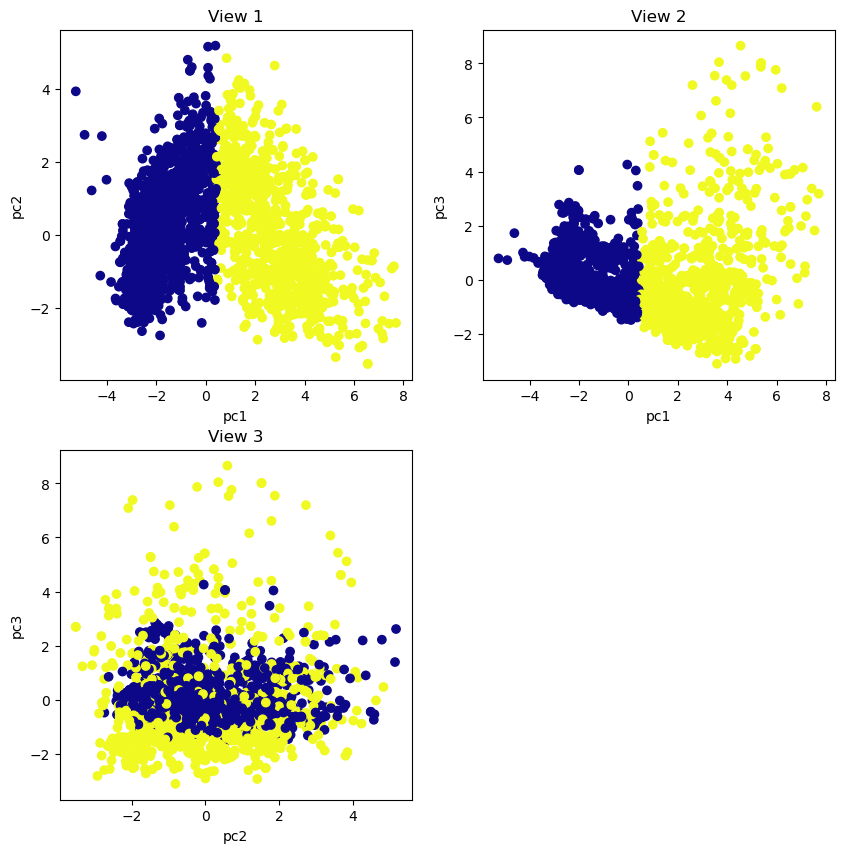

In [52]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)

plt.scatter(X_pca_3D[:,0], X_pca_3D[:,1], c = y_pred_pca_3D, cmap='plasma')
plt.title('View 1')
plt.xlabel('pc1')
plt.ylabel('pc2')


plt.subplot(2, 2, 2)

plt.scatter(X_pca_3D[:,0], X_pca_3D[:,2], c = y_pred_pca_3D, cmap='plasma')
plt.title('View 2')
plt.xlabel('pc1')
plt.ylabel('pc3')


plt.subplot(2, 2, 3)

plt.scatter(X_pca_3D[:,1], X_pca_3D[:,2], c = y_pred_pca_3D, cmap='plasma')
plt.title('View 3')
plt.xlabel('pc2')
plt.ylabel('pc3')

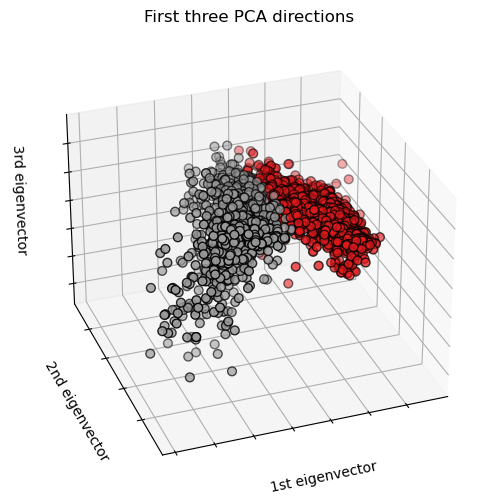

In [53]:
# To getter a better understanding of interaction of the dimensions, plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = X_pca_3D
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_pred_pca_3D,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()